# Recommandation de films par factorisation de matrices

L'objectif de ce TP est d'implémenter des algorithmes  permettant de recommander des films à des utilisateurs.

Le TP comporte deux parties :

* Manipulation et affichage des données donnant des informations sur les films et les préférences des utilisateurs.

* Implémentation de deux algorithmes pour la recommandation.



## Partie I

* On considère un ensemble d'utilisateurs qui ont noté des films selon leurs préférences. On va utiliser une variable de type dictionnaire pour stocker ces informations. Ci-dessous un exemple. 

In [1]:
donnees ={'Jill': {'Avenger: Age of Ultron': 7.0,
'Django Unchained': 6.5,
'Gone Girl': 9.0,
'Kill the Messenger': 8.0},
'Julia': {'Avenger: Age of Ultron': 10.0,
'Django Unchained': 6.0,
'Gone Girl': 6.5,
'Kill the Messenger': 6.0,
'Zoolander': 6.5},
'Max': {'Avenger: Age of Ultron': 7.0,
'Django Unchained': 7.0,
'Gone Girl': 10.0,
'Horrible Bosses 2': 6.0,
'Kill the Messenger': 5.0,
'Zoolander': 10.0},
'Robert': {'Avenger: Age of Ultron': 8.0,
'Django Unchained': 7.0,
'Horrible Bosses 2': 5.0,
'Kill the Messenger': 9.0,
'Zoolander': 9.0},
'Sam': {'Avenger: Age of Ultron': 10.0,
'Django Unchained': 7.5,
'Gone Girl': 6.0,
'Horrible Bosses 2': 3.0,
'Kill the Messenger': 5.5,
'Zoolander': 7.0},
'Toby': {'Avenger: Age of Ultron': 8.5,
'Django Unchained': 9.0,
'Zoolander': 2.0},
'William': {'Avenger: Age of Ultron': 6.0,'Django Unchained': 8.0,
'Gone Girl': 7.0,
'Horrible Bosses 2': 4.0,
'Kill the Messenger': 6.5,
'Zoolander': 4.0}}

* Pour afficher le dictionnaire on peut utiliser la librairie Pandas et le type dataFrame. Pandas est une librairie pour manipuler facilment des données.  Ci-dessous le code permettant d'afficher les films, les utilisatuers et leurs préférences. 

In [2]:
import pandas as pd
df = pd.DataFrame(donnees)
df

,Jill,Julia,Max,Robert,Sam,Toby,William
Avenger: Age of Ultron,7.0,10.0,7.0,8.0,10.0,8.5,6.0
Django Unchained,6.5,6.0,7.0,7.0,7.5,9.0,8.0
Gone Girl,9.0,6.5,10.0,NaN,6.0,NaN,7.0
Horrible Bosses 2,NaN,NaN,6.0,5.0,3.0,NaN,4.0
Kill the Messenger,8.0,6.0,5.0,9.0,5.5,NaN,6.5
Zoolander,NaN,6.5,10.0,9.0,7.0,2.0,4.0


1. Ecrire une fonction qui permet de saisir des films, des utilisateurs et leurs préférences. La fonction retourne une variable de type dictionnaire qui contient ces informations comme indiqué dans l'exemple ci-dessus.

In [ ]:
from io import StringIO

def add_movie(df):
    print("Donnez le nom du film")
    name = input()
    print("Donnez une liste de nom d'utlisateur et sa preference")
    print("Example:Jill, 7.0 \n\tJulia, 6.5")
    input_text = input()
    df1 = pd.read_csv(StringIO(input_text),index_col=name)
    df1_transposed = df1.T
    df.append(df1_transposed)
    

add_movie(df)

2. Ecrire une fonction `note` qui permet de retourner la note d'un utilisateur à un film. 

In [3]:
def note(df,film_name,username):
    return df.loc[film_name,username] 

print(note(df,'Django Unchained','Jill'))

6.5


Dans ce qui suit, on s'intéresse à comparer deux films. On utilise une liste L pour stcoker les notes de ces deux films.

3. Utilisant la fonction `note`, écrire un code qui crée une liste L de tuples chacun contenant l'utilisateur et ses deux notes à deux films choisis parmi la liste des films dans `donnees`. Par exemple, la fonction avec les paramètres  `django` et `avenger` retourne : 

`[('Jill', 6.5, 7.0), ('Julia', 6.0, 10.0), ('Max', 7.0, 7.0), ('Robert', 7.0, 8.0), ('Sam', 7.5, 10.0), ('Toby', 9.0, 8.5), ('William', 8.0, 6.0)]`.


In [8]:
def compare(df,first,second):
    note_list = []
    columnsNamesArr = df.columns.values
    for i in columnsNamesArr:
        note_list.append((i,note(df,first,i),note(df,second,i)))
    return note_list

L = compare(df,'Django Unchained','Avenger: Age of Ultron')
L

[('Jill', 6.5, 7.0),
 ('Julia', 6.0, 10.0),
 ('Max', 7.0, 7.0),
 ('Robert', 7.0, 8.0),
 ('Sam', 7.5, 10.0),
 ('Toby', 9.0, 8.5),
 ('William', 8.0, 6.0)]

On peut afficher la liste utilisant le format `dataFrame` de pandas.

In [9]:
df = pd.DataFrame(data = L, columns = ['user', 'django','avenger'])
df

,user,django,avenger
0,Jill,6.5,7.0
1,Julia,6.0,10.0
2,Max,7.0,7.0
3,Robert,7.0,8.0
4,Sam,7.5,10.0
5,Toby,9.0,8.5
6,William,8.0,6.0


* Le code suivant permet de représenter graphiquement la liste L.

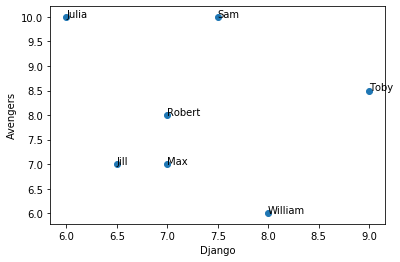

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.django, df.avenger)
plt.xlabel('Django')
plt.ylabel('Avengers')
for i,txt in enumerate(df.user):
  plt.annotate(txt, (df.django[i],df.avenger[i]))
plt.show()

4. Ecrire une fonction qui calcule la distance euclidienne entre les notes de deux utilisateurs de la liste L.  Utiliser la fonction pour afficher la distance entre par exemple `Jill` et `Toby` et celle entre `Robert` et `Max` et comparer les résultats (vous pouvez choisir n'importe quels utilisateurs de `donnees`).

In [57]:
import numpy as np
def calculateDistance(x1,y1,x2,y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2) 
first = df[df['user'] =='Jill']
second =  df[ df['user'] =='Toby']

print(calculateDistance(first['django'].iloc[(0,)],first['avenger'].iloc[(0,)],second['django'].iloc[(0,)],second['avenger'].iloc[(0,)]))


""" alternative avec une liste"""

def dist(L,first,second):
    for element in L:
        name,first_val,second_val = element
        if name==first:
            x1 = first_val
            y1 = second_val
        elif name == second:
            x2 = first_val
            y2 = second_val
        
    return calculateDistance(x1,y1,x2,y2)
    
print(dist(L,'Jill','Toby'))
print(dist(L,'Robert','Max'))

2.9154759474226504
2.9154759474226504
1.0


5. Ecrire une fonction qui calcule la similarité entre deux utilisateurs de la liste `L`. La similarité est définie comme étant égale à `1/(1+distance)`. 

In [58]:
def similarity(L,first,second):
    return(1/(1+dist(L,first,second)))

print(similarity(L,'Jill','Toby'))
print(similarity(L,'Robert','Max'))

0.2553967929896867
0.5


6. Ecrire un code qui permet de calculer la similarité entre deux utilisateurs à partir de tous les films qu'ils ont notés (dans la variable `donnees`).

7. Ecrire un code qui permet d'afficher par ordre décroissant les utilisatuers similaires à un utilisatuer donnée.

In [0]:
# Code à compléter



## Partie 2

Comme vous l'avez remarqué en affichant la variable `donnees`, on n'a pas les notes pour tous les films. Il y a des cases vides (NAN).

Pouvoir recommander des films à des utilisateurs revient dans ce cas à trouver une bonne estimation des valeurs manquantes. 

In [62]:
import pandas as pd
df = pd.DataFrame(donnees)
df['Jill']

Avenger: Age of Ultron    7.0
Django Unchained          6.5
Gone Girl                 9.0
Horrible Bosses 2         NaN
Kill the Messenger        8.0
Zoolander                 NaN
Name: Jill, dtype: float64

Une façon de faire est d'identifier les utilisateurs  similaires à un utilsateur qu'on veut lui recommander un film et de remplacer la valeure manquante par la moyenne des notes de ces utilisateurs similaires. L'idée est que des utilisateurs similaires ont les mêmes préférences.



8. Ecrire un programe qui permet de remplir les notes manquantes d'un utilisateur donné (par exemple `Jill`). La valeur manquante pour un utilisateur est remplacée par la moyenne des notes des deux utilisateurs les plus similaires à cet utilisateur.

In [63]:
def remplir(df,name):
    df[name].fillna((df[name].mean()), inplace=True)

remplir(df,'Jill')
df

,Jill,Julia,Max,Robert,Sam,Toby,William
Avenger: Age of Ultron,7.000,10.0,7.0,8.0,10.0,8.5,6.0
Django Unchained,6.500,6.0,7.0,7.0,7.5,9.0,8.0
Gone Girl,9.000,6.5,10.0,NaN,6.0,NaN,7.0
Horrible Bosses 2,7.625,NaN,6.0,5.0,3.0,NaN,4.0
Kill the Messenger,8.000,6.0,5.0,9.0,5.5,NaN,6.5
Zoolander,7.625,6.5,10.0,9.0,7.0,2.0,4.0


Une autre façon de faire est d'utiliser des décompositions matricielles. On va utiliser dans ce projet la décomosition en valeurs singulières. On transforme la variable `donnees` en une matrice `mat`.

In [64]:
mat = df.as_matrix()
print(mat)


[[ 7.    10.     7.     8.    10.     8.5    6.   ]
 [ 6.5    6.     7.     7.     7.5    9.     8.   ]
 [ 9.     6.5   10.       nan  6.       nan  7.   ]
 [ 7.625    nan  6.     5.     3.       nan  4.   ]
 [ 8.     6.     5.     9.     5.5      nan  6.5  ]
 [ 7.625  6.5   10.     9.     7.     2.     4.   ]]


/home/sotiris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


9. remplacer les valeurs manquantes dans `mat` par des zéros.

In [65]:
mat = np.nan_to_num(mat)
mat

array([[ 7.   , 10.   ,  7.   ,  8.   , 10.   ,  8.5  ,  6.   ],
       [ 6.5  ,  6.   ,  7.   ,  7.   ,  7.5  ,  9.   ,  8.   ],
       [ 9.   ,  6.5  , 10.   ,  0.   ,  6.   ,  0.   ,  7.   ],
       [ 7.625,  0.   ,  6.   ,  5.   ,  3.   ,  0.   ,  4.   ],
       [ 8.   ,  6.   ,  5.   ,  9.   ,  5.5  ,  0.   ,  6.5  ],
       [ 7.625,  6.5  , 10.   ,  9.   ,  7.   ,  2.   ,  4.   ]])

10. Calculer la décomposition SVD de la matrice `mat`.

In [68]:
u, s, vh = np.linalg.svd(mat, full_matrices=False)

11. Reconstruire la matrice utilisant les deux premières valeurs singulières et les deux premiers vecteurs singuliers. Afficher le résultat et comparer avec la matrice `mat`. Que remarquez vous ?

In [72]:
np.allclose(mat, np.dot(u * s, vh))
smat = np.diag(s)
np.allclose(mat, np.dot(u, np.dot(smat, vh)))

True

Le résultat obtenu permet de trouver des valeurs pour les valeurs manquantes mais change aussi les valeurs qui n'étaient pas manquantes. 


12. Ecrire les lignes de codes qui permettent de modifier dans 'mat' que les valeurs manquantes obtenues par la reconsruction par SVD.

In [77]:
svd = np.dot(u * s, vh)
mat
def modify_values(matrix,svd):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j]== 0:
                matrix[i][j] = svd[i][j]
    return

modify_values(mat,svd)
mat

array([[ 7.00000000e+00,  1.00000000e+01,  7.00000000e+00,
         8.00000000e+00,  1.00000000e+01,  8.50000000e+00,
         6.00000000e+00],
       [ 6.50000000e+00,  6.00000000e+00,  7.00000000e+00,
         7.00000000e+00,  7.50000000e+00,  9.00000000e+00,
         8.00000000e+00],
       [ 9.00000000e+00,  6.50000000e+00,  1.00000000e+01,
        -6.80788520e-15,  6.00000000e+00,  1.21733733e-14,
         7.00000000e+00],
       [ 7.62500000e+00,  6.59896520e-15,  6.00000000e+00,
         5.00000000e+00,  3.00000000e+00, -2.37981377e-15,
         4.00000000e+00],
       [ 8.00000000e+00,  6.00000000e+00,  5.00000000e+00,
         9.00000000e+00,  5.50000000e+00, -7.41912427e-15,
         6.50000000e+00],
       [ 7.62500000e+00,  6.50000000e+00,  1.00000000e+01,
         9.00000000e+00,  7.00000000e+00,  2.00000000e+00,
         4.00000000e+00]])

13. Ecrire un code qui permet d'itérer les étapes 10, 11 et 12 plusieurs fois. Le nombre de répétition est fixé par un entier `k` fixé à l'avance.

In [0]:
k =3
for i in range(k):
    


**Bonus.** On s'intéresse maintenant à compléter un grand nombre de trous choisis aléatoirment.

14. Ecrire un code qui permet de :

    * générer deux matrices aléatoires `matrice` et `filtre`. `matrice` contient des valeurs réels et `filtre` des valeurs égales à 1 ou 0,
    
    * créer les trous en générant la matrice `mat` produit de Hadamard de `matrice` et `filtre`,
    
    * calculer la matrice `matrice_reconstruite` la reconstruction de `matrice`  utilisant 13, 
    
    * afficher l'erreur de reconstruction qui est égale à la norme de la différence entre `matrice` et `matrice_reconstruite`

In [0]:
# code à compléter

15. Ecrire un programme qui permet d'afficher les graphiques suivants : 
  
       * la courbe d'erreur de reconstruction en variant le nombre de trous (c'est à dire le nombre de zéro dans la matrice `filtre`),
       
       * la courbe d'erreur de reconstruction en variant le nombre de valeurs singulières utilisé pour la reconstruction.

In [0]:
# code à compléter